<a href="https://colab.research.google.com/github/nabilaranie/Colabs/blob/main/CaseStudy1_Kelompok_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Anggota Kelompok F

1. Ammar Hanafi (2206051582)
2. Nabila Putri Maharani (2206053953)
3. Norman Mowlana Aziz (2206025470)
4. Jason Justin Andryana(2206029670)
5. Muhammad Riesya Attaya (2206051494)

In [ ]:
#Berfungsi untuk mengimport library yang diperlukan
import numpy as np #Library numpy diinisialkan sebagai np
import pandas as pd #Library pandas diinisialkan sebagai pd
import matplotlib.pyplot as plt #Library matplotlib.pyplot diinisialkan sebagai plt
import seaborn as sn #Library seaborn diinisialkan sebagai sns
pd.set_option("display.max_colwidth", 200)

In [ ]:
# Load data
from sklearn.datasets import fetch_20newsgroups #import data yang sudah di sediakan pada

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes')) # mendefinisikan dataset sebagai fetch_20newsgroups tanpa headers, footers and quote
documents = dataset.data # mendefinisikan document sebagai dataset

In [ ]:
# Look at the dataset
documents[:2] #liat datasetnya

["Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n",
 "\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap

In [ ]:
print(f"Total Documents : {len(documents)}") #Berfungsi untuk menampilkan banyaknya data atay document pada dataset dengan fungsi len() untuk melihat panjangnya

Total Documents : 11314


In [ ]:
dataset.target_names #Berfungsi untuk menampilkan nama target yang ada di dataset

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
#Berfungsi untuk mengkonvert data documents ke dalam format dataframe untuk pre-processing
news_df = pd.DataFrame({'document':documents})

#Berfungsi untuk menghilangkan semua text selain huruf biasa
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z#]", " ")

#Berfungsi untuk menghilangkan kata-kata dengan <= 3 huruf karena dianggap tidak penting
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

#Berfungsi untuk mengubah semua huruf besar menjadi huruf kecil untuk menghilangkan case-sensitivity
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

<ipython-input-32-8e7e12c9b3df>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z#]", " ")


In [ ]:
# Load stopwords (here I used Spacy for stopwords you can also use NLTK)
from spacy.lang.en.stop_words import STOP_WORDS as stop_words # Import stopwords dari spacy.lang.en.stop_words

# tokenization - break sentences into words
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split()) # pecahin kalimat menjadi kata-kata

# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words]) #menghilang stopwords

# de-tokenization - Join words to get back the sentences
detokenized_doc = [] # membuat list baru untuk mengabunggkan kata kata yang sudah di pecahkan
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc # mendefinisikan data ulang agak sudah bersih dari stopwords

# **Kasus diambil 1000 Data**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english',
max_features= 1000, # keep top 1000 terms
max_df = 0.5,
smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])

X.shape # check shape of the document-term matrix

(11314, 1000)

In [ ]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

len(svd_model.components_)

20

In [ ]:
terms = vectorizer.get_feature_names_out() #Berfungsi untuk mendapatkan daftar semua kata yang telah di-tokenisasi dan di-stemming

for i, comp in enumerate(svd_model.components_): #Berfungsi untuk memulai loop for yang akan mengiterasi melalui semua komponen model SVD.
    terms_comp = zip(terms, comp) #Berfungsi untuk membuat iterator yang menggabungkan daftar kata dengan komponen SVD saat ini
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7] #Berfungsi untuk mengurutkan iterator berdasarkan nilai komponen SVD dalam urutan menurun, dan kemudian mengambil 7 kata teratas
    print("Topic "+str(i)+": ", end='', flush=True) #Berfungsi untuk mencetak judul topik saat ini
    for t in sorted_terms: #Berfungsi untuk mencetak setiap kata dalam 7 kata teratas, dipisahkan oleh spasi
        print(t[0], end=' ', flush=True) #Berfungsi untuk mencetak baris baru
    print(" ")

Topic 0: like know people think good time thanks  
Topic 1: thanks windows card drive mail file advance  
Topic 2: game team year games season players good  
Topic 3: drive scsi hard disk card drives problem  
Topic 4: windows file window files program problem version  
Topic 5: government space chip mail information data encryption  
Topic 6: like bike chip sounds know looks look  
Topic 7: card sale video monitor offer price jesus  
Topic 8: know card chip video government people clipper  
Topic 9: good know time bike problem jesus work  
Topic 10: think good chip clipper need encryption people  
Topic 11: thanks problem right bike good window time  
Topic 12: good people windows know sale file files  
Topic 13: space think know nasa problem year israel  
Topic 14: space good card thanks people year nasa  
Topic 15: people problem game window time work want  
Topic 16: problem good window israel people know israeli  
Topic 17: file time problem need files mail game  
Topic 18: need r

In [ ]:
X_topics = svd_model.fit_transform(X) #Untuk mendefinisikan topic yang ingin diplot

In [ ]:
from sklearn.manifold import TSNE #Berfungsi untuk mengimpor kelas TSNE dari library sklearn.manifold
embedding = TSNE(n_components=2).fit_transform(X_topics) #Berfungsi untuk membuat objek TSNE dengan 2 komponen dan inisialisasi acak. Kemudian, memanggil metode fit_transform() untuk melakukan transformasi t-SNE pada data X_topics. Metode ini akan mengembalikan embedding t-SNE dari data X_topics

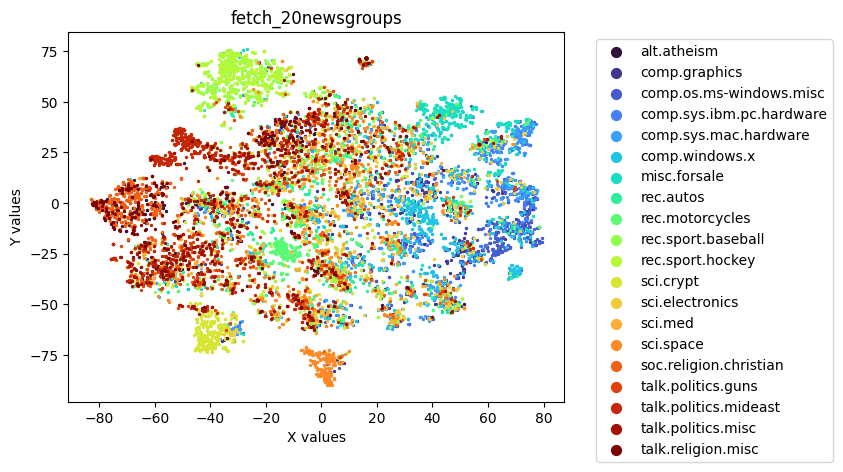

In [ ]:

TOPIC = dataset.target_names

#Shape(n,x) dengan x=0 untuk menyatakan posisi data di sumbu x dan Shape(n,y) dengan y=1 untuk menyatakan posisi data di sumbu y.
x_values = embedding[:, 0]
y_values = embedding[:, 1]
topic_numbers = dataset.target

#Untuk menghasilkan peta warna dengan warna berbeda untuk 20 topik
num_topics = 20
cmap = plt.get_cmap('turbo', num_topics)

#Petakan nomor topik ke topik terkait menggunakan daftar TOPIC
topics = [TOPIC[int(num)] for num in topic_numbers]

# Membuat scatter plot dengan warna berbeda untuk setiap topic
for topic_num in set(topic_numbers):
    mask = (topic_numbers == topic_num)
    plt.scatter(x_values[mask], y_values[mask], label=TOPIC[topic_num], color=cmap(topic_num), s=2)

plt.legend()

plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('fetch_20newsgroups')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', markerscale=5.0)

plt.show()


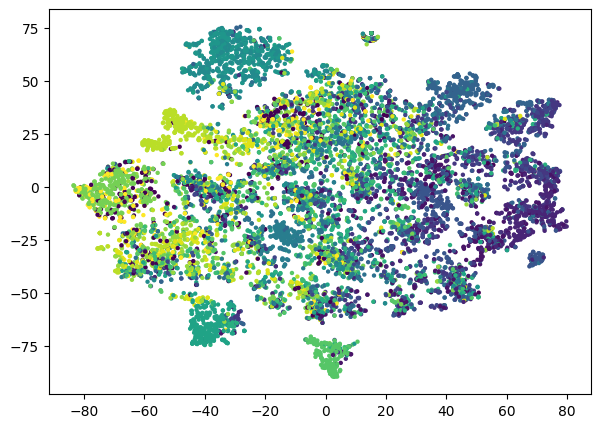

In [ ]:
plt.figure(figsize=(7,5))  #Untuk mengatur ukuran plot dengan panjang 7 satuan dan lebar 5 satuan
plt.scatter(embedding[:, 0], embedding[:, 1], #Shape(n,x) dengan x=0 untuk menyatakan posisi data di sumbu x dan Shape(n,y) dengan y=1 untuk menyatakan posisi data di sumbu y.
c = dataset.target, #c=colors or color berfungsi untuk membuat setiap document merujuk ke satu warna tertentu sesuai dengan newgroup dari document
s = 10, #s=size berfungsi untuk mengatur besar kecilnya titik titik data
edgecolor='none'
)#Berfungsi untuk meniadakan urutan pada warna
plt.show() #Untuk mengatur ukuran plot dengan panjang 7 satuan dan lebar 5 satuan

# **Kasus diambil 5000 Data**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english',
max_features= 5000, # keep top 5000 terms
max_df = 0.5,
smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])

X.shape # check shape of the document-term matrix

(11314, 5000)

In [ ]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

len(svd_model.components_)

20

In [ ]:
terms = vectorizer.get_feature_names_out() #Berfungsi untuk mendapatkan daftar semua kata yang telah di-tokenisasi dan di-stemming

for i, comp in enumerate(svd_model.components_): #Berfungsi untuk memulai loop for yang akan mengiterasi melalui semua komponen model SVD.
    terms_comp = zip(terms, comp) #Berfungsi untuk membuat iterator yang menggabungkan daftar kata dengan komponen SVD saat ini
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7] #Berfungsi untuk mengurutkan iterator berdasarkan nilai komponen SVD dalam urutan menurun, dan kemudian mengambil 7 kata teratas
    print("Topic "+str(i)+": ", end='', flush=True) #Berfungsi untuk mencetak judul topik saat ini
    for t in sorted_terms: #Berfungsi untuk mencetak setiap kata dalam 7 kata teratas, dipisahkan oleh spasi
        print(t[0], end=' ', flush=True) #Berfungsi untuk mencetak baris baru
    print(" ")

Topic 0: like know people think good time thanks  
Topic 1: thanks windows card drive mail file advance  
Topic 2: drive scsi drives hard disk controller card  
Topic 3: game team games thanks year pitt players  
Topic 4: pitt cadre chastity shameful gordon intellect skepticism  
Topic 5: thanks mail know drive advance email address  
Topic 6: chip encryption clipper government keys data phone  
Topic 7: card video monitor drivers cards driver sale  
Topic 8: know like chip thanks clipper bike going  
Topic 9: like bike good sale window space offer  
Topic 10: israel armenian armenians israeli turkish people jews  
Topic 11: window problem space display card time server  
Topic 12: space know nasa card files file shuttle  
Topic 13: like know israel game jews file israeli  
Topic 14: know good bike sale file israel condition  
Topic 15: know window think people sale mail list  
Topic 16: think israel file files israeli need jews  
Topic 17: file people problem files armenian armenians 

In [ ]:
X_topics = svd_model.fit_transform(X) #Untuk mendefinisikan topic yang ingin diplot

In [ ]:
from sklearn.manifold import TSNE #Berfungsi untuk mengimpor kelas TSNE dari library sklearn.manifold
embedding = TSNE(n_components=2).fit_transform(X_topics) #Berfungsi untuk membuat objek TSNE dengan 2 komponen dan inisialisasi acak. Kemudian, memanggil metode fit_transform() untuk melakukan transformasi t-SNE pada data X_topics. Metode ini akan mengembalikan embedding t-SNE dari data X_topics

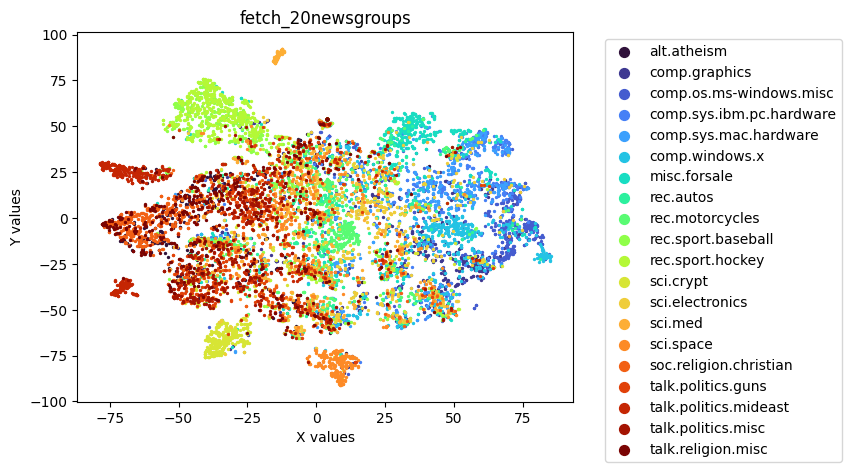

In [ ]:

TOPIC = dataset.target_names

#Shape(n,x) dengan x=0 untuk menyatakan posisi data di sumbu x dan Shape(n,y) dengan y=1 untuk menyatakan posisi data di sumbu y.
x_values = embedding[:, 0]
y_values = embedding[:, 1]
topic_numbers = dataset.target

#Untuk menghasilkan peta warna dengan warna berbeda untuk 20 topik
num_topics = 20
cmap = plt.get_cmap('turbo', num_topics)

#Petakan nomor topik ke topik terkait menggunakan daftar TOPIC
topics = [TOPIC[int(num)] for num in topic_numbers]

# Membuat scatter plot dengan warna berbeda untuk setiap topic
for topic_num in set(topic_numbers):
    mask = (topic_numbers == topic_num)
    plt.scatter(x_values[mask], y_values[mask], label=TOPIC[topic_num], color=cmap(topic_num), s=2)

plt.legend()

plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('fetch_20newsgroups')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', markerscale=5.0)

plt.show()

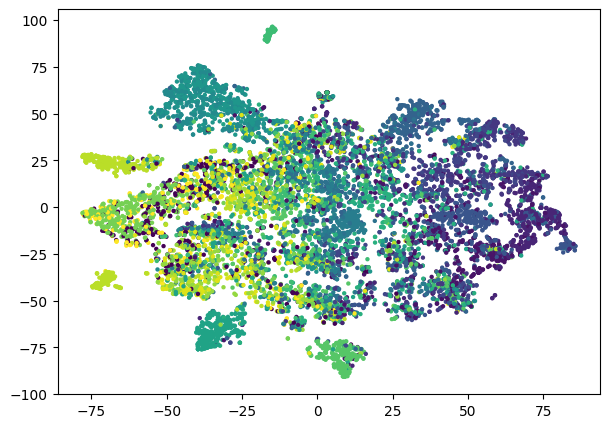

In [ ]:
plt.figure(figsize=(7,5))  #Untuk mengatur ukuran plot dengan panjang 7 satuan dan lebar 5 satuan
plt.scatter(embedding[:, 0], embedding[:, 1], #Shape(n,x) dengan x=0 untuk menyatakan posisi data di sumbu x dan Shape(n,y) dengan y=1 untuk menyatakan posisi data di sumbu y.
c = dataset.target, #c=colors or color berfungsi untuk membuat setiap document merujuk ke satu warna tertentu sesuai dengan newgroup dari document
s = 10, #s=size berfungsi untuk mengatur besar kecilnya titik titik data
edgecolor='none'
)#Berfungsi untuk meniadakan urutan pada warna
plt.show() #Untuk mengatur ukuran plot dengan panjang 7 satuan dan lebar 5 satuan

# Kesimpulan

 Dapat diketahui perbedaan antara penggunaan Max_Feature 1000 vs 5000 adalah  jumlah maksimum fitur pada max_feature 5000 terlihat lebih padat di setiap topik dan berapa kata yang muncul terbanyak pada setiap topic yang ada juga berbeda









